In [134]:
import startingFinance as fin
import optionValue as opv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_toolkits.mplot3d.axes3d as p3
from pprint import pprint 
import seaborn as sns

In [135]:
mpl.rcParams["font.family"]= "serif"
sns.set()
%matplotlib inline

In [136]:
data = fin.assetParams(**{"Kplot":{}, 'Tplot': {}, 'Rplot':{}, 'Splot':{}})


# BASICS NOTIONS IN FINANCE, SOME OPTIONS  AND ANALYSIS

The idea of the notebook is just to give us a basic notions in financial and let's the cumbersome mathematics theoritical
I note that theoritical is sometimes bothering and hidde the true meaning and understanding on financial.
So I decide to give my little understanding about finance and how analyse some instruments.

In the following, I give the utility of finance about my understanding and give some reason why finance is useful in mankind.

The finance can be defined as the science or study which figures out how people, business and group make and use money. It mean:
- Thinking about money
- Thinking about how money control money to make profit
- Studying how to take chanves in project that make money

Due to many reasons and help people to have a better life some researchers focus on this topic.
So, to improve the wellfare of the sociey, many researchers were studying on the topic and were giving some modelling to do business more easier , more fun and more interesting.
This researchers design tools and formalize them through a science known as  financial mathematics.
Moreover, they present many model to evaluate derivatives, most goods existing in real life.

In order to have a basic notion , I use the black scholes and merton model for pricing method because the model lies on good assumptions only useful in school framework.

So,for having a better understanding , I give some basics notions on options and explain  how people do some analysis to find a strategy to do profit.

## OPTIONS 

Options are financial instruments that are derivatives based on the value of underlying securities such as stocks. An options contract offers the buyer the opportunity to buy or sell—depending on the type of contract they hold—the underlying asset.

There are two basics options most used on financial market as known as call and put options.

### Call Options

It can refer to an option contract giving the owner the right, but not the obligation, to buy a specified amount of an underlying security at a specified price within a specified time. It can also refer to a call auction, a time when buyers set a maximum acceptable price to buy, and sellers set the minimum satisfactory price to sell a security on an exchange

A call option is defined by the following 4 characteristics:
- There is an underlying stock or index
- There is an expiration date of the option
- There is a strike price of the option
- The option is the right to BUY the underlying stock or index. This contrasts to a put option, which is the right to sell the underlying stock

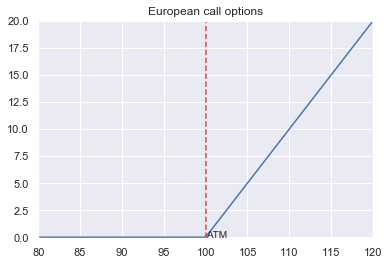

In [137]:

call = opv.callValue(data["K"], *(data["Kplot"]["start"], data["Kplot"]["end"], data["points"]))
span = np.linspace(data["Kplot"]["start"], data["Kplot"]["end"], data["points"])
plt.axes(ylim =(-0.1,20), xlim =(80,120))
plt.plot(span, call)
plt.annotate('ATM',xy=(data["K"],0))
plt.axvline(data["K"], c ="r", ls="--")
plt.title("European call options")
pass

### Put Options

A put option is a contract giving the owner the right, but not the obligation, to sell, or sell short, a specified amount of an underlying security at a pre-determined price within a specified time frame. The pre-determined price the put option buyer can sell at is called the strike price.

As the call options, the same characteristics describe this options

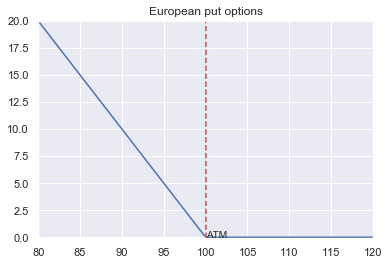

In [138]:
plt.axes(ylim =(-0.1,20), xlim =(80,120))
put = opv.putValue(data["K"], *(data["Kplot"]["start"], data["Kplot"]["end"], data["points"]))
span = np.linspace(data["Kplot"]["start"], data["Kplot"]["end"], data["points"])
plt.plot(span, put)
plt.annotate('ATM',xy=(data["K"],0))
plt.axvline(data["K"], c ="r", ls="--")
plt.title("European put options")


pass

After giving some examples of call and put options, I focus on european option and describe how its used on financial market.
We give now some explanations on the pricing method draw the value of options and the curve of pricing options.

### EUROPEAN OPTIONS

The pricing of european option from black scholes and merton model has a close formula that describe through over all the world.
In this section, I present the pricing of call and put option.

#### Call Option

The call option formula is calculated by multiplying the stock price by the cumulative standard normal probability distribution function. Thereafter, the net present value (NPV) of the strike price multiplied by the cumulative standard normal distribution is subtracted from the resulting value of the previous calculation.

$$ C =  S_t N(d_1) - K e^{-r(T-t)}N(d_2)$$

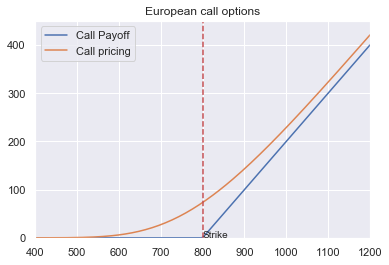

In [139]:

dataCal = {
    'K':800,
    'T':1.0,
    'r':0.025,
    'vol':0.2,
    'start':400,
    'end':1200,
    'points':150,
    't':0.0
            }
call = opv.callValue(dataCal["K"], *(dataCal["start"], dataCal["end"], dataCal["points"]))
span = np.linspace(dataCal["start"], dataCal["end"], dataCal["points"])
callPr = list(map(lambda S : fin.bsmCallValue(S,dataCal["K"], dataCal["t"], dataCal["T"], dataCal["r"], dataCal["vol"]), span))
plt.axes(ylim =(-1,450), xlim =(400,1200))
plt.plot(span, call, label ='Call Payoff')
plt.plot(span, callPr, label='Call pricing')
plt.axvline(dataCal["K"], c='r', ls= '--', ymin= 0)
plt.annotate('Strike', xy=(dataCal['K'],1))
plt.legend()
plt.title("European call options")
pass

#### Put Options

The put options formula is calculated by substracting the call and by  current value stock and adding the net value value of the strike. That express as following :
$$ P = C  - S_t + KB(t,T)$$

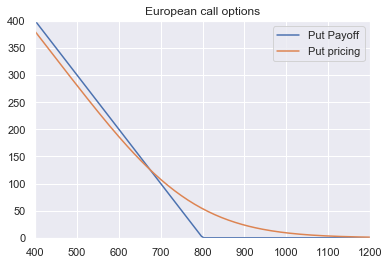

In [140]:
dataPut = {
    'K':800,
    'T':1.0,
    'r':0.025,
    'vol':0.2,
    'start':400,
    'end':1200,
    'points':150,
    't':0.0
            }
put = opv.putValue(dataCal["K"], *(dataPut["start"], dataPut["end"], dataPut["points"]))
span = np.linspace(dataCal["start"], dataPut["end"], dataPut["points"])
putPr = list(map(lambda S : fin.bsmPutValue(S,dataPut["K"], dataPut["t"], dataPut["T"], dataPut["r"], dataPut["vol"]), span))
plt.axes(ylim =(-1,dataPut["end"]- dataPut["K"]), xlim =(dataPut["start"],dataPut["end"]))
plt.plot(span, put, label ='Put Payoff')
plt.plot(span, putPr, label='Put pricing')
plt.legend()
plt.title("European call options")
pass

After drawing, the curving price of call and put european options, I study the monotonicity of call and put ceterius paribus. I mean you fixed almost parameters and one varies. I do this procedure for the maturity, the strike , the volatitly and the interest rate with our pricing method.

### Monotonicity of Options

In [141]:
def plotOption(option, data):
    if isinstance(data, dict)== False:
        raise("Not data available for plotting")
    
    fig, ax = plt.subplots(2,2,figsize = (10,6))

    try:
        if 'Kplot' in data:
            kspan = np.linspace(data["Kplot"]["start"], data["Kplot"]["end"], data["points"])
            vspan = list(map(lambda k : option(data["St"], k, data["t"], data["T"], data["r"], data["sigma"]), kspan))
            ax[0,0].plot(kspan, vspan)
            ax[0,0].grid("True")
            ax[0,0].set_ylabel("present value")
            ax[0,0].set_xlabel("Strike $K$")
    except :
        pass

    try:
        if 'Tplot' in data:
            tspan = np.linspace(data["Tplot"]["start"], data["Tplot"]["end"], data["points"])
            vspan = list(map(lambda k : option(data["St"], data['K'], data["t"], k, data["r"], data["sigma"]), tspan))
            ax[0,1].plot(tspan, vspan)
            ax[0,1].grid("True")
            ax[0,1].set_ylabel("present value")
            ax[0,1].set_xlabel("Maturity $T$")
    except :
        pass
    
    try:
        if 'Rplot' in data:
            rspan = np.linspace(data["Rplot"]["start"], data["Rplot"]["end"], data["points"])
            vspan = list(map(lambda k : option(data["St"], data["K"], data["t"], data["T"], k, data["sigma"]), rspan))
            ax[1,0].plot(rspan, vspan)
            ax[1,0].grid("True")
            ax[1,0].set_ylabel("present value")
            ax[1,0].set_xlabel("Risk $r$")
    except :
        pass
    
    try:
        if 'Splot' in data:
            ospan = np.linspace(data["Splot"]["start"], data["Splot"]["end"], data["points"])
            vspan = list(map(lambda k : option(data["St"], data['K'], data["t"], data["T"], data["r"], k), ospan))
            ax[1,1].plot(ospan, vspan)
            ax[1,1].grid("True")
            ax[1,1].set_ylabel("present value")
            ax[1,1].set_xlabel("volatility $\sigma$")
    except :
        pass

    plt.tight_layout()
    if option.__doc__.find("put")!= -1:
        plt.suptitle("European put for varying strike , maturity T, short rate r, and volatitlity")
    
    if option.__doc__.find("call")!= -1:
        plt.suptitle("European call for varying strike K, maturity T, short rate r, and volatitlity")
        

### Monotonicity of put

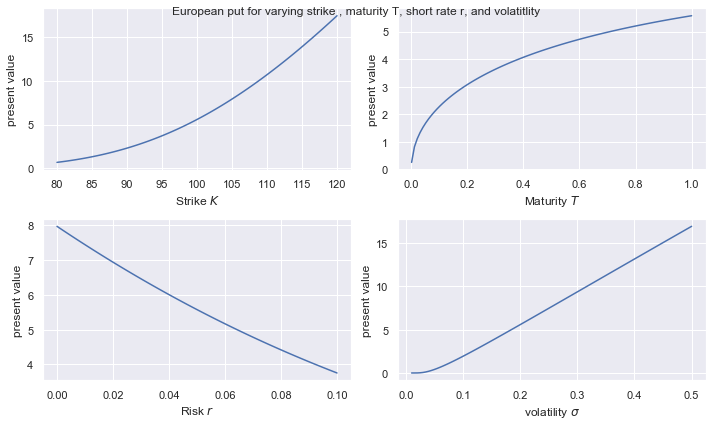

In [142]:
plotOption(fin.bsmPutValue,data)

The monotonicity of the put is displayed ,I observe that the put is non increasing function in  interest rate. It is not surprising because when the interest rate goes up the price goes down.
I can interpret the other curve as the previous interpretation with the interest rate.

For the call option , the same approach can be observed too and have the same interpretation with the parameters ceterius paribus.



##  GREEKS IN THE BLACK SCHOLES MERTON MODEL

"Greeks" is a term used in the options market to describe the different dimensions of risk involved in taking an options position. These variables are called Greeks because they are typically associated with Greek symbols. Each risk variable is a result of an imperfect assumption or relationship of the option with another underlying variable. Traders use different Greek values, such as delta, theta, and others, to assess options risk and manage option portfolios. 

In [143]:
def plotGreeks(function, greek):
    tlist = np.linspace(data["Tplot"]['start'], data["Tplot"]["end"], data["points"])
    klist = np.linspace(data["Kplot"]["start"], data["Kplot"]["end"], data["points"])
    V = np.zeros((len(tlist), len(klist)), dtype='float')
    for j in range(len(klist)):
        for i in range(len(tlist)):
            V[i,j] = function(data['St'], klist[j], data['t'], tlist[i], data["r"], data["sigma"])
    
    # 3D plotting
    X,Y = np.meshgrid(klist, tlist)
    fig = plt.figure(figsize =(9,5))
    plot = p3.Axes3D(fig)
    plot.plot_wireframe(X,Y,V)
    plot.set_xlabel('Strike $K$')
    plot.set_ylabel('maturity $T$')
    plot.set_zlabel('%s(K,T)' %greek)


### Delta

The delta  $\Delta$ measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

For the call option (C) the delta is defined as :
$$ \Delta = \frac{ \partial C}{ \partial S} = N(d_1) $$

I mean if the underlying stock increases in price by \$1 per share, the option on it will rise by $N(d_1)$ per share, all else being equal

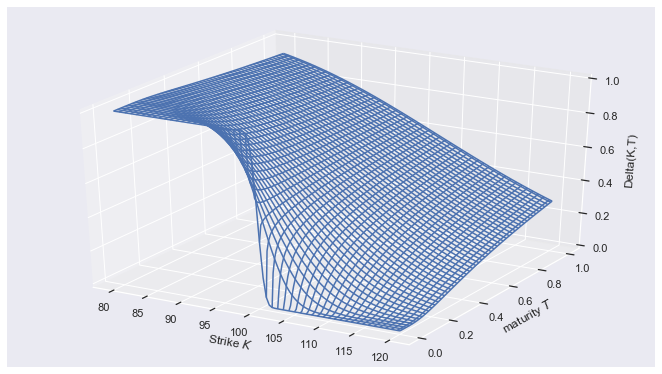

In [144]:
plotGreeks(fin.bsmDelta, 'Delta')

The delta of the call option varies both with moneyness
and maturity date T; it is between 1 and 0 for far ITM(in the money) options and far OTM(out the money) options,
respectively, with short maturity; delta changes most around the ATM(at the money) level for short
maturities

### Gamma

The Gamma ($\Gamma$) represents the rate of change between an option's delta and the underlying asset's price. This is called second-order (second-derivative) price sensitivity. It expresses as following :

$$ \Gamma = \frac{ \partial^{2} C}{ \partial S^{2}}  = \frac{ N^{'}(d_1)}{S \sigma \sqrt(T-t)}$$

The gamma $\Gamma$ has the highest values around the ATM level for short maturities.
Moreover I observe that more we get closer to expiration, our probability curve gets much more narrow.

This can be good for option buyers, but especially bad for option sellers. It can quickly turn winning trades into losers, or losing trades into winners.

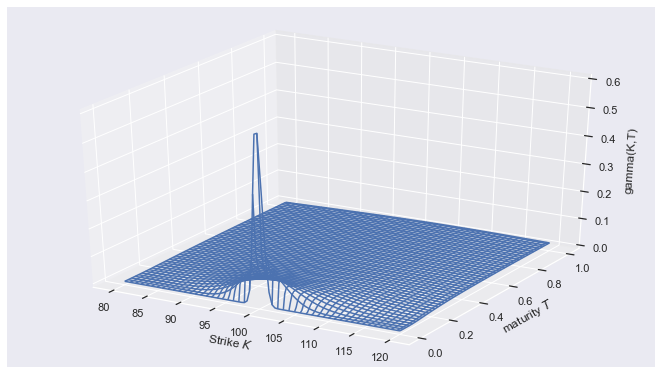

In [145]:
plotGreeks(fin.bsmGamma, 'gamma')

How compute the change of stock.

When the stock is trading at \$115, the put option on the \$113 strike with 30 days to expiry is worth \$1.34. It has a delta of -0.3357 and a gamma of 0.062.

The gamma of the put is 0.793 when the stock change.

In fact, I establish the relation between the gamma and the delta and check the initial condition of delta

$$ \Delta(S)= \int \Gamma \partial S$$

Next, I establish the relation between value of asset and the delta

$$ V(S) = \int \Delta(S) \partial S $$

In the nutshell, I hope this notebook can be useful and help someome about  european and call option.
In the next notebook, I decide to go deep, I may be work on implied volatility surface.